In [ ]:
!pip install python-tsp
!pip install geopandas
!pip install networkx
!pip install folium
!pip install python_tsp
!pip install osmnx
import pickle
import numpy as np
from python_tsp.heuristics import solve_tsp_lin_kernighan
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt



In [ ]:

gdf = gpd.read_file('/content/geojs-35-mun.json')
gdf['centroid'] = gdf['geometry'].centroid
gdf.head()

<ipython-input-10-601660735343>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


,id,name,description,geometry,centroid
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",POINT (-51.05616 -21.57630)
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",POINT (-49.65281 -21.28808)
2,3500303,Aguaí,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",POINT (-47.03971 -22.04960)
3,3500402,Águas da Prata,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",POINT (-46.69131 -21.91376)
4,3500501,Águas de Lindóia,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",POINT (-46.60305 -22.47405)



# 20 municipios


In [ ]:
import pickle
with open('matriz_distancias.pkl', 'rb') as f:

    objeto = pickle.load(f)

df = objeto

municipios = [
  "São Paulo",
  "Americana",
  "Araraquara",
  "Barretos",
  "Bauru",
  "Botucatu",
  "Campinas",
  "Franca",
  "Itu",
  "Jundiaí",
  "Limeira",
  "Marília",
  "Piracicaba",
  "Presidente Prudente",
  "Ribeirão Preto",
  "Santos",
  "São José do Rio Preto",
  "São José dos Campos",
  "Sorocaba",
  "Taubaté"
]

df_filtrado = df[(df['origem'].isin(municipios)) & (df['destino'].isin(municipios))]

In [ ]:
df_filtrado

,origem,destino,distancia
11628,Americana,Americana,0.000000
11646,Americana,Araraquara,138.251170
11672,Americana,Barretos,282.405335
11677,Americana,Bauru,196.085539
11695,Americana,Botucatu,122.099664
...,...,...,...
390136,Taubaté,São José do Rio Preto,472.103359
390137,Taubaté,São José dos Campos,43.664838
390142,Taubaté,São Paulo,132.753490
390161,Taubaté,Sorocaba,203.277464


In [ ]:
lista

[[0.0,
  138.25117015618423,
  282.4053349378002,
  196.0855386299973,
  122.09966425709942,
  30.805327284495416,
  240.25974409176115,
  64.65976017018306,
  64.87179787323184,
  15.819526927766525,
  283.80247620886627,
  50.81931106614373,
  425.33022636289536,
  176.27979357218538,
  162.76802178613818,
  302.0993049340441,
  145.3567153083837,
  121.83565419882817,
  83.65223960692285,
  187.65095292043912],
 [138.25117015618423,
  0.0,
  149.6193697920657,
  110.19603829440129,
  122.33600017612225,
  168.42786562740704,
  160.11688732085446,
  191.52153121329076,
  202.92060401005836,
  122.87410889066828,
  190.9331085682394,
  111.37627790971511,
  327.5052633737518,
  74.2985502989205,
  300.8988618190941,
  164.35830418571777,
  272.88974468237234,
  259.2070133919346,
  200.07377335156445,
  310.85250609863823],
 [282.4053349378002,
  149.6193697920657,
  0.0,
  198.8148592443886,
  260.8038558975541,
  310.70865208913347,
  132.6344256316545,
  339.9995007488835,
  346.97

In [ ]:
#O Lugar onde a magia acontece

municipios = [
  "Americana",
  "Araraquara",
  "Barretos",
  "Bauru",
  "Botucatu",
  "Campinas",
  "Franca",
  "Itu",
  "Jundiaí",
  "Limeira",
  "Marília",
  "Piracicaba",
  "Presidente Prudente",
  "Ribeirão Preto",
  "Santos",
  "São José do Rio Preto",
  "São José dos Campos",
  "São Paulo",
  "Sorocaba",
  "Taubaté"
]



lista = []

for item in municipios:
  lista.append([])


n = 0
z = 0
for index, row in df_filtrado.iterrows():

  x = 0

  if row['origem'] == municipios[z]:

    a = row['origem']
    b = row['destino']
    c = row['distancia']
    print(f'z = {z} e b = {b}')

    lista[z].append(row['distancia'])
  else:

    z +=1
    if z == 20:
     print(f'A distancia de {a} a {b} é de {c} e foi salvo na lista {z}')

  if row['destino'] == 'Americana': #
    if row['origem'] != 'Americana':
      lista[z].append(row['distancia'])


z = 0 e b = Americana
z = 0 e b = Araraquara
z = 0 e b = Barretos
z = 0 e b = Bauru
z = 0 e b = Botucatu
z = 0 e b = Campinas
z = 0 e b = Franca
z = 0 e b = Itu
z = 0 e b = Jundiaí
z = 0 e b = Limeira
z = 0 e b = Marília
z = 0 e b = Piracicaba
z = 0 e b = Presidente Prudente
z = 0 e b = Ribeirão Preto
z = 0 e b = Santos
z = 0 e b = São José do Rio Preto
z = 0 e b = São José dos Campos
z = 0 e b = São Paulo
z = 0 e b = Sorocaba
z = 0 e b = Taubaté
z = 1 e b = Araraquara
z = 1 e b = Barretos
z = 1 e b = Bauru
z = 1 e b = Botucatu
z = 1 e b = Campinas
z = 1 e b = Franca
z = 1 e b = Itu
z = 1 e b = Jundiaí
z = 1 e b = Limeira
z = 1 e b = Marília
z = 1 e b = Piracicaba
z = 1 e b = Presidente Prudente
z = 1 e b = Ribeirão Preto
z = 1 e b = Santos
z = 1 e b = São José do Rio Preto
z = 1 e b = São José dos Campos
z = 1 e b = São Paulo
z = 1 e b = Sorocaba
z = 1 e b = Taubaté
z = 2 e b = Araraquara
z = 2 e b = Barretos
z = 2 e b = Bauru
z = 2 e b = Botucatu
z = 2 e b = Campinas
z = 2 e b = Fran

In [ ]:
import numpy as np
lista_braba = np.array(lista)

In [ ]:
matriz_final

array([[  0.        , 138.25117016, 282.40533494, 196.08553863,
        122.09966426,  30.80532728, 240.25974409,  64.65976017,
         64.87179787,  15.81952693, 283.80247621,  50.81931107,
        425.33022636, 176.27979357, 162.76802179, 302.09930493,
        145.35671531, 121.8356542 ,  83.65223961, 187.65095292],
       [138.25117016,   0.        , 149.61936979, 110.19603829,
        122.33600018, 168.42786563, 160.11688732, 191.52153121,
        202.92060401, 122.87410889, 190.93310857, 111.37627791,
        327.50526337,  74.2985503 , 300.89886182, 164.35830419,
        272.88974468, 259.20701339, 200.07377335, 310.8525061 ],
       [282.40533494, 149.61936979,   0.        , 198.81485924,
        260.8038559 , 310.70865209, 132.63442563, 339.99950075,
        346.9728969 , 266.58918303, 230.22296687, 260.94137897,
        323.77726604, 115.8489097 , 444.06651777,  80.04646066,
        400.83763906, 404.17855409, 349.58569901, 432.67807492],
       [196.08553863, 110.19603829, 1

In [ ]:
from python_tsp.heuristics import solve_tsp_lin_kernighan
lista_braba = np.array(matriz_final)

start_node = 17
x0 = [start_node] + [i for i in range(20) if i != start_node]

xopt, fopt = solve_tsp_lin_kernighan(lista_braba, x0=x0)

In [ ]:
from python_tsp.heuristics import solve_tsp_simulated_annealing
lista_braba = np.array(matriz_final)

start_node = 17
x0 = [start_node] + [i for i in range(20) if i != start_node]

xopt, fopt = solve_tsp_simulated_annealing(lista_braba, x0=x0,
    log_file = None,
    verbose = True,
)


Temperature 74.305613174652. Current value: 4524.871691207675 k: 1/200 k_accepted: 0/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 4524.871691207675 k: 2/200 k_accepted: 0/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 4524.6426335450415 k: 3/200 k_accepted: 1/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 4062.6948468583 k: 4/200 k_accepted: 2/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 3868.603563869311 k: 5/200 k_accepted: 3/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 3868.603563869311 k: 6/200 k_accepted: 3/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 3848.44862458236 k: 7/200 k_accepted: 4/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 3420.3251372692303 k: 8/200 k_accepted: 5/20 k_noimprovements: 0
Temperature 74.305613174652. Current value: 3457.334558637635 k: 9/200 k_accepted: 6/20 k_noimprovements: 0
Temperature 74.305613174652. 

In [ ]:
from python_tsp.heuristics import solve_tsp_record_to_record


start_node = 17
x0 = [start_node] + [i for i in range(20) if i != start_node]

xopt, fopt = solve_tsp_record_to_record(lista_braba, x0=x0,
    max_iterations = 3,
    log_file = None,
    verbose = True,
)

In [ ]:
xopt

[0, 5, 8, 16, 19, 14, 17, 7, 18, 4, 3, 10, 12, 15, 2, 6, 13, 1, 11, 9]

In [ ]:
fopt

1714.3604658442766

In [ ]:
municipios = [
  "São Paulo",
  "Americana",
  "Araraquara",
  "Barretos",
  "Bauru",
  "Botucatu",
  "Campinas",
  "Franca",
  "Itu",
  "Jundiaí",
  "Limeira",
  "Marília",
  "Piracicaba",
  "Presidente Prudente",
  "Ribeirão Preto",
  "Santos",
  "São José do Rio Preto",
  "São José dos Campos",
  "Sorocaba",
  "Taubaté"
]

In [ ]:
gdf = gpd.read_file('/content/geojs-35-mun.json')
gdf['centroid'] = gdf['geometry'].centroid
gdf.head()

<ipython-input-121-601660735343>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


,id,name,description,geometry,centroid
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",POINT (-51.05616 -21.57630)
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",POINT (-49.65281 -21.28808)
2,3500303,Aguaí,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",POINT (-47.03971 -22.04960)
3,3500402,Águas da Prata,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",POINT (-46.69131 -21.91376)
4,3500501,Águas de Lindóia,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",POINT (-46.60305 -22.47405)


# Alguns outros solvers

In [ ]:
!pip install py2opt

  Preparing metadata (setup.py) ... done
  Created wheel for random2: filename=random2-1.0.1-py3-none-any.whl size=12043 sha256=4bd73b7b2c463a01e2ddf9e0fa12c02ea90c828134e5a0ce7434337c719746be
  Stored in directory: /root/.cache/pip/wheels/61/1f/84/8713326a151c1638e7a00202e4074b46e839d22b7d22f8400f
Successfully built random2


In [ ]:
#nearest neighbour

import numpy as np



matriz_final = lista_braba

def solve_tsp_nearest_neighbor(dist_matrix, start_node):
    n = dist_matrix.shape[0]
    visited = [False] * n
    tour = [start_node]
    visited[start_node] = True
    current_node = start_node

    for _ in range(n - 1):
        nearest_neighbor = None
        min_distance = float('inf')
        for neighbor in range(n):
            if not visited[neighbor] and dist_matrix[current_node, neighbor] < min_distance:
                nearest_neighbor = neighbor
                min_distance = dist_matrix[current_node, neighbor]
        tour.append(nearest_neighbor)
        visited[nearest_neighbor] = True
        current_node = nearest_neighbor


    tour.append(start_node)
    total_distance = sum(dist_matrix[tour[i], tour[i + 1]] for i in range(n))

    return tour, total_distance

# São Paulo = 562
start_node = 562


tour, total_distance = solve_tsp_nearest_neighbor(lista_braba, start_node)

print("Tour:", tour)
print("Total distance:", total_distance)


Tour: [562, 152, 545, 330, 486, 494, 534, 544, 149, 542, 211, 569, 459, 348, 252, 296, 558, 168, 254, 167, 588, 121, 283, 64, 528, 437, 30, 565, 633, 144, 257, 387, 101, 187, 186, 109, 634, 293, 308, 636, 629, 108, 217, 583, 377, 18, 142, 43, 170, 136, 345, 536, 280, 216, 410, 417, 21, 349, 429, 615, 357, 267, 285, 47, 79, 363, 523, 44, 264, 444, 180, 584, 343, 74, 71, 504, 514, 277, 207, 230, 432, 288, 631, 414, 580, 575, 304, 4, 258, 171, 538, 548, 3, 567, 154, 98, 596, 555, 271, 632, 123, 518, 454, 439, 516, 301, 37, 138, 522, 492, 241, 132, 6, 563, 433, 506, 493, 346, 472, 608, 292, 130, 78, 240, 118, 32, 508, 640, 581, 13, 319, 272, 507, 235, 273, 95, 103, 320, 212, 86, 557, 354, 539, 613, 427, 455, 208, 27, 497, 297, 559, 362, 474, 604, 96, 282, 400, 120, 566, 232, 621, 150, 306, 113, 97, 579, 40, 554, 35, 55, 470, 300, 148, 431, 110, 543, 644, 344, 2, 593, 531, 568, 573, 517, 106, 124, 535, 11, 89, 574, 145, 487, 161, 63, 458, 210, 358, 490, 524, 19, 36, 221, 546, 151, 22, 141, 

In [ ]:
fopt = menor_distancia
xopt = melhor_rota

In [ ]:
menor_distancia

18975.158859890267

In [ ]:
#Random Walk

import numpy as np
import random

matriz_final = lista_braba


def solve_tsp_random_neighbor(dist_matrix, start_node):
    n = dist_matrix.shape[0]
    visited = [False] * n
    tour = [start_node]
    visited[start_node] = True
    current_node = start_node

    for _ in range(n - 1):
        neighbors = [i for i in range(n) if not visited[i]]
        next_node = random.choice(neighbors)
        tour.append(next_node)
        visited[next_node] = True
        current_node = next_node


    tour.append(start_node)
    total_distance = sum(dist_matrix[tour[i], tour[i + 1]] for i in range(n))

    return tour, total_distance

#562 = SP
start_node = 562


tour, total_distance = solve_tsp_random_neighbor(lista_braba, start_node)

print("Tour:", tour)
print("Total distance:", total_distance)

Tour: [562, 335, 517, 230, 529, 466, 563, 167, 176, 258, 283, 379, 284, 251, 278, 204, 350, 502, 52, 482, 105, 442, 568, 227, 308, 601, 102, 406, 174, 140, 6, 319, 642, 340, 598, 196, 303, 201, 100, 461, 269, 236, 410, 540, 262, 188, 156, 237, 92, 383, 107, 281, 309, 316, 42, 7, 116, 76, 122, 382, 472, 631, 192, 98, 575, 272, 549, 361, 465, 36, 21, 588, 441, 454, 444, 291, 368, 370, 170, 69, 311, 504, 31, 86, 522, 294, 183, 602, 128, 536, 15, 443, 348, 155, 638, 197, 637, 374, 275, 135, 91, 528, 226, 591, 1, 169, 32, 70, 211, 390, 27, 578, 80, 337, 273, 605, 132, 633, 449, 446, 552, 113, 409, 530, 41, 558, 431, 232, 416, 581, 362, 23, 301, 594, 570, 191, 159, 506, 496, 396, 208, 106, 463, 364, 636, 17, 315, 266, 160, 356, 88, 20, 359, 229, 298, 321, 597, 484, 595, 166, 559, 386, 164, 507, 430, 408, 620, 199, 152, 391, 171, 249, 388, 136, 539, 264, 483, 329, 330, 628, 182, 480, 560, 426, 557, 71, 420, 125, 418, 462, 556, 610, 302, 198, 387, 68, 373, 344, 239, 511, 134, 218, 609, 277, 25

In [ ]:
#random walk repetição

menor_distancia = 10000000
melhor_rota = []
import numpy as np
import random

maior_ditancia = 0
pior_rota = []

start_node = 562
n = 0

for count in range(10000):
  tour, total_distance = solve_tsp_random_neighbor(lista_braba, start_node)
  if total_distance < menor_distancia:
    menor_distancia = total_distance
    melhor_rota = tour
  if total_distance > maior_ditancia:
    maior_ditancia = total_distance
    pior_rota = tour
  print(f' {round(n/100)}% Conlcluido')
  n+=1

A saída de streaming foi truncada nas últimas 5000 linhas.
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 50% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlcluido
 51% Conlclui

Melhor distancia e Pior Distancia

In [ ]:
menor_distancia = 10000000
melhor_rota = []

maior_ditancia = 0
pior_rota = []


In [ ]:
tour = melhor_rota
total_distance = menor_distancia

In [ ]:
tour = pior_rota
total_distance = maior_ditancia

In [ ]:
maior_ditancia

5342.995155198778

In [ ]:
fopt = menor_distancia
xopt = melhor_rota

In [ ]:
fiop menor_distancia

23198.022700309906

In [ ]:
#Random N Neighbour

n = 0
N = 3

menor_distancia = 10000000
melhor_rota = []

maior_ditancia = 0
pior_rota = []


for count in range(1000):
  tour, total_distance = solve_tsp_hybrid(lista_braba, start_node, N)
  if total_distance < menor_distancia:
    menor_distancia = total_distance
    melhor_rota = tour
  if total_distance > maior_ditancia:
    maior_ditancia = total_distance
    pior_rota = tour
  print(f' {round(n/10)}% Conlcluido')
  n+=1

 0% Conlcluido
 0% Conlcluido
 0% Conlcluido
 0% Conlcluido
 0% Conlcluido
 0% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 1% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 2% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 3% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 4% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 5% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 6% Conlcluido
 7% Conlcl

In [ ]:
import numpy as np
import random

# posição de SP
start_node = 562
if start_node >= len(matriz_final):
    raise ValueError("start_node está fora do intervalo da matriz de distâncias")


def solve_tsp_hybrid(dist_matrix, start_node, N):
    n = dist_matrix.shape[0]
    if start_node >= n:
        raise ValueError("start_node está fora do intervalo da matriz de distâncias")

    visited = [False] * n
    tour = [start_node]
    visited[start_node] = True
    current_node = start_node

    for _ in range(n - 1):
        distances = [(dist_matrix[current_node, i], i) for i in range(n) if not visited[i]]
        distances.sort()
        nearest_neighbors = [i for _, i in distances[:N]]
        next_node = random.choice(nearest_neighbors)
        tour.append(next_node)
        visited[next_node] = True
        current_node = next_node


    tour.append(start_node)
    total_distance = sum(dist_matrix[tour[i], tour[i + 1]] for i in range(n))

    return tour, total_distance

# N rotas testadas
N = 3


tour, total_distance = solve_tsp_hybrid(lista_braba, start_node)

print("Tour:", tour)
print("Total distance:", total_distance)


Tour: [17, 18, 7, 0, 5, 16, 9, 4, 1, 6, 15, 3, 10, 12, 13, 11, 8, 2, 19, 14, 17]
Total distance: 3065.732834665333


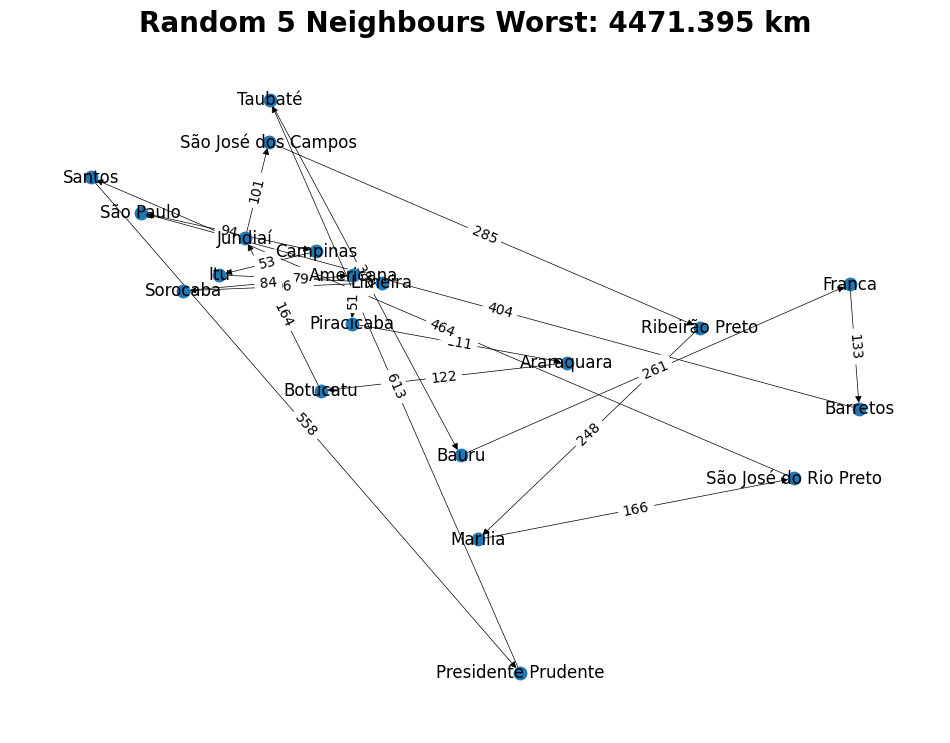

In [ ]:
G = nx.DiGraph()
for i in tour:
  G.add_node(i, name=municipios[i])
edges_list = [tuple(tour[i:i+2]) for i in range(len(tour)-1)]
for from_node, to_node in edges_list:
  G.add_edge(from_node, to_node,
             distance=lista_braba[from_node, to_node],
             name=f'{from_node} -> {to_node}'
             )
ref_df = gdf.set_index('name')
pos_ = dict()
for i in tour:
  node_name = municipios[i]
  temp_pos = ref_df.loc[node_name, 'centroid']
  pos_[i] = (temp_pos.y, temp_pos.x)
node_labels = {index: name for index, name in enumerate(municipios)}
temp_edge_labels = [round(lista_braba[from_node, to_node]) for from_node, to_node in edges_list]
edge_labels = {e: label for e,label in zip(G.edges(), temp_edge_labels)}

import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.title(f'Random 5 Neighbours Worst: {round(total_distance,3)} km', weight='bold', fontsize=20)

nx.draw(G,pos_,with_labels=True, node_size=80, width=0.5, labels=node_labels)

nx.draw_networkx_edge_labels(G,pos_,edge_labels=edge_labels)
plt.show()

# Visualizando

In [ ]:
gdf = gpd.read_file('/content/geojs-35-mun.json')
gdf['centroid'] = gdf['geometry'].centroid
gdf.head()

<ipython-input-127-601660735343>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


,id,name,description,geometry,centroid
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",POINT (-51.05616 -21.57630)
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",POINT (-49.65281 -21.28808)
2,3500303,Aguaí,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",POINT (-47.03971 -22.04960)
3,3500402,Águas da Prata,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",POINT (-46.69131 -21.91376)
4,3500501,Águas de Lindóia,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",POINT (-46.60305 -22.47405)


In [ ]:
m = 0

In [ ]:
G = nx.DiGraph()

In [ ]:
for i in xopt:
  G.add_node(i, name=municipios[i])

In [ ]:
print(G)

DiGraph with 20 nodes and 0 edges


In [ ]:
edges_list = [tuple(xopt[i:i+2]) for i in range(len(xopt)-1)]
for from_node, to_node in edges_list:
  G.add_edge(from_node, to_node,
             distance=lista_braba[from_node, to_node],
             name=f'{from_node} -> {to_node}'
             )

In [ ]:
ref_df = gdf.set_index('name')
pos_ = dict()
for i in xopt:
  node_name = municipios[i]
  temp_pos = ref_df.loc[node_name, 'centroid']
  pos_[i] = (temp_pos.y, temp_pos.x)

In [ ]:
node_labels = {index: name for index, name in enumerate(municipios)}
temp_edge_labels = [round(lista_braba[from_node, to_node]) for from_node, to_node in edges_list]
edge_labels = {e: label for e,label in zip(G.edges(), temp_edge_labels)}

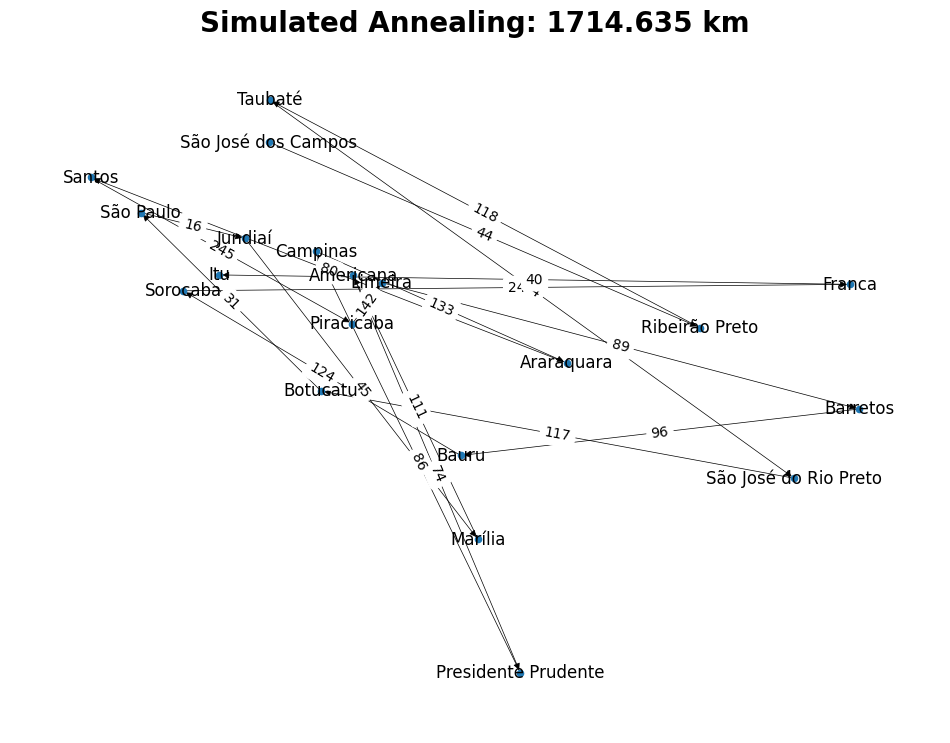

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.title(f'Simulated Annealing: {round(fopt,3)} km', weight='bold', fontsize=20)
nx.draw(G,pos_,with_labels=True, node_size=20, width=0.5, labels=node_labels)
nx.draw_networkx_edge_labels(G,pos_,edge_labels=edge_labels)
plt.show()

# 600 municipios

In [ ]:
with open('matriz_distancias.pkl', 'rb') as f:
    objeto = pickle.load(f)

df = objeto

In [ ]:

with open('matriz_distancias.pkl', 'rb') as f:
    objeto = pickle.load(f)

df = objeto

In [ ]:
df

,origem,destino,distancia
0,Adamantina,Adamantina,0.000000
1,Adamantina,Adolfo,148.940883
2,Adamantina,Aguaí,418.569402
3,Adamantina,Águas da Prata,453.052818
4,Adamantina,Águas de Lindóia,470.358245
...,...,...,...
416020,Estiva Gerbi,Votorantim,156.210267
416021,Estiva Gerbi,Votuporanga,372.186267
416022,Estiva Gerbi,Zacarias,344.211276
416023,Estiva Gerbi,Chavantes,299.869859


In [ ]:
unique_names = df['origem'].nunique()

print("\nNúmero de nomes únicos na coluna 'nome':", unique_names)


Número de nomes únicos na coluna 'nome': 645


In [ ]:
lista = []

for count in range (645):
  lista.append([])

In [ ]:
todos = []
for name in df['origem']:
    if name not in todos:
        todos.append(name)


In [ ]:
lista = []
n = 0
z = 0
for count in range (645):
  lista.append([])
x = 0

for index, row in df.iterrows():

  a = row['origem']
  b = row['destino']
  c = row['distancia']
  print(z)
  if row['origem'] == todos[z]:
    print(f'A distancia de {a} a {b} é de {c} e foi salvo na lista {z}')
    lista[z].append(row['distancia'])
  else:
    z +=1
    print(row['origem'])
    print(todos[z])


  if row['destino'] == 'Adamantina':
    if row['origem'] != 'Adamantina':
      lista[z].append(row['distancia'])
      print('Deixa q o pai trabalha')
  x += 1
  print(f'{round((x*100/416024),3)}% Concluido')
  n+=1



A saída de streaming foi truncada nas últimas 5000 linhas.
99.6% Concluido
642
A distancia de Zacarias a Itirapuã é de 304.0800288476669 e foi salvo na lista 642
99.6% Concluido
642
A distancia de Zacarias a Itobi é de 331.47344103626796 e foi salvo na lista 642
99.601% Concluido
642
A distancia de Zacarias a Itu é de 373.64438562913 e foi salvo na lista 642
99.601% Concluido
642
A distancia de Zacarias a Itupeva é de 380.3410353615731 e foi salvo na lista 642
99.601% Concluido
642
A distancia de Zacarias a Ituverava é de 249.35543349015475 e foi salvo na lista 642
99.601% Concluido
642
A distancia de Zacarias a Jaborandi é de 177.9300256461865 e foi salvo na lista 642
99.601% Concluido
642
A distancia de Zacarias a Jaboticabal é de 183.2264329344428 e foi salvo na lista 642
99.602% Concluido
642
A distancia de Zacarias a Jacareí é de 482.6440528573893 e foi salvo na lista 642
99.602% Concluido
642
A distancia de Zacarias a Jaci é de 52.62854622792515 e foi salvo na lista 642
99.602% C

In [ ]:
lista = []
n = 0
z = 0
for count in range (645):
  lista.append([])

In [ ]:
import pickle

with open("matriz_de_distancias.pkl", "wb") as arquivo:
    pickle.dump(lista, arquivo)

In [ ]:

with open('matriz_de_distancias.pkl', 'rb') as f:

    matriz_final = pickle.load(f)

In [ ]:
matriz_final

array([[  0.        , 138.25117016, 282.40533494, 196.08553863,
        122.09966426,  30.80532728, 240.25974409,  64.65976017,
         64.87179787,  15.81952693, 283.80247621,  50.81931107,
        425.33022636, 176.27979357, 162.76802179, 302.09930493,
        145.35671531, 121.8356542 ,  83.65223961, 187.65095292],
       [138.25117016,   0.        , 149.61936979, 110.19603829,
        122.33600018, 168.42786563, 160.11688732, 191.52153121,
        202.92060401, 122.87410889, 190.93310857, 111.37627791,
        327.50526337,  74.2985503 , 300.89886182, 164.35830419,
        272.88974468, 259.20701339, 200.07377335, 310.8525061 ],
       [282.40533494, 149.61936979,   0.        , 198.81485924,
        260.8038559 , 310.70865209, 132.63442563, 339.99950075,
        346.9728969 , 266.58918303, 230.22296687, 260.94137897,
        323.77726604, 115.8489097 , 444.06651777,  80.04646066,
        400.83763906, 404.17855409, 349.58569901, 432.67807492],
       [196.08553863, 110.19603829, 1

In [ ]:
df.iloc[363000]

origem         São Paulo
destino      Sandovalina
distancia     547.771756
Name: 363000, dtype: object

In [ ]:
len(todos)

645

In [ ]:
lista_braba

array([[  0.        , 138.25117016, 282.40533494, 196.08553863,
        122.09966426,  30.80532728, 240.25974409,  64.65976017,
         64.87179787,  15.81952693, 283.80247621,  50.81931107,
        425.33022636, 176.27979357, 162.76802179, 302.09930493,
        145.35671531, 121.8356542 ,  83.65223961, 187.65095292],
       [138.25117016,   0.        , 149.61936979, 110.19603829,
        122.33600018, 168.42786563, 160.11688732, 191.52153121,
        202.92060401, 122.87410889, 190.93310857, 111.37627791,
        327.50526337,  74.2985503 , 300.89886182, 164.35830419,
        272.88974468, 259.20701339, 200.07377335, 310.8525061 ],
       [282.40533494, 149.61936979,   0.        , 198.81485924,
        260.8038559 , 310.70865209, 132.63442563, 339.99950075,
        346.9728969 , 266.58918303, 230.22296687, 260.94137897,
        323.77726604, 115.8489097 , 444.06651777,  80.04646066,
        400.83763906, 404.17855409, 349.58569901, 432.67807492],
       [196.08553863, 110.19603829, 1

In [ ]:
posicao = todos.index('São Paulo')

print(f"O item está na posição {posicao}.")

O item está na posição 562.


In [ ]:
from python_tsp.heuristics import solve_tsp_lin_kernighan
lista_braba = np.array(lista)

start_node = 562
x0 = [start_node] + [i for i in range(645) if i != start_node]

xopt, fopt = solve_tsp_lin_kernighan(lista_braba, x0=x0)

In [ ]:
fopt

13702.348569534515

In [ ]:
#xopt

In [ ]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

lista_braba = np.array(lista)

start_node = 562
x0 = [start_node] + [i for i in range(645) if i != start_node]

xopt, fopt = solve_tsp_simulated_annealing(lista_braba, x0=x0)

In [ ]:
fopt

12190.785911680829

In [ ]:
from python_tsp.heuristics import solve_tsp_record_to_record


lista_braba = np.array(lista)

start_node = 562
x0 = [start_node] + [i for i in range(645) if i != start_node]


xopt, fopt = solve_tsp_record_to_record(lista_braba, x0=x0, max_iterations = 3, log_file = None, verbose = True)

Current value: 168273.14411461522; Iteration: 1


KeyboardInterrupt: 

In [ ]:
fopt

13136.64059497332

# Visualizando 2

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/geojs-35-mun.json')
gdf['centroid'] = gdf['geometry'].centroid
print(gdf.head())


        id              name       description  \
0  3500105        Adamantina        Adamantina   
1  3500204            Adolfo            Adolfo   
2  3500303             Aguaí             Aguaí   
3  3500402    Águas da Prata    Águas da Prata   
4  3500501  Águas de Lindóia  Águas de Lindóia   

                                            geometry  \
0  POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...   
1  POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...   
2  POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...   
3  POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...   
4  POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...   

                      centroid  
0  POINT (-51.05616 -21.57630)  
1  POINT (-49.65281 -21.28808)  
2  POINT (-47.03971 -22.04960)  
3  POINT (-46.69131 -21.91376)  
4  POINT (-46.60305 -22.47405)  


<ipython-input-182-284f46be213d>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


In [ ]:
import folium


initial_location = (gdf['centroid'].iloc[xopt[0]].y, gdf['centroid'].iloc[xopt[0]].x)
m = folium.Map(location=initial_location, zoom_start=5)
route = [gdf['centroid'].iloc[i] for i in xopt] + [gdf['centroid'].iloc[xopt[0]]]
route_coordinates = [(point.y, point.x) for point in route]
folium.PolyLine(route_coordinates, color="red", weight=2.5, opacity=1).add_to(m)

m.save("tsp_route.html")
m
